In [173]:
import pandas as pd
import numpy as np
import json
import gzip
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.cluster import KMeans, MiniBatchKMeans
from collections import defaultdict
from sklearn.cluster import KMeans
import nltk
import gensim
import os
import string
import re
import os
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.cluster import DBSCAN
from sklearn.externals import joblib


# pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_colwidth', 50)

In [174]:
import tweepy
import cnfg
import pandas as pd
config = cnfg.load("./.twitter_config")



auth = tweepy.OAuthHandler(config["consumer_key"],
                           config["consumer_secret"])

auth.set_access_token(config["access_token"],
                      config["access_token_secret"])

api = tweepy.API(auth)

In [175]:
pd.set_option('display.max_colwidth', -1)

In [176]:
listrecommenders = ['VolumePrintcess']

In [177]:
max_tweets=1

#Tweepy Cursor handles pagination .. 

for tweet in tweepy.Cursor(api.search, q="$AXP").items(max_tweets):
    print(tweet.text)

10 Reasons Visa Could Be the World's Most Perfect Stock @themotleyfool #stocks $IBM, $MA, $AXP, $DFS, $V, $PYPL https://t.co/PDRmki5UXe


In [208]:
import csv
def get_all_tweets(screen_name):

    api = tweepy.API(auth)
    #initialize a list to hold all the tweepy Tweets
    alltweets = []
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)

    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print("getting tweets before %s" % (oldest))
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print("...%s tweets downloaded so far" % (len(alltweets)))
    #transform the tweepy tweets into a 2D array that will populate the csv	
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    
    with open('%s_tweets.csv' % screen_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)
    pass

In [209]:
get_all_tweets("VolumePrintcess")

getting tweets before 847528989384208385
...400 tweets downloaded so far
getting tweets before 821722835248939007
...600 tweets downloaded so far
getting tweets before 796385359567458303
...800 tweets downloaded so far
getting tweets before 774949000671731712
...1000 tweets downloaded so far
getting tweets before 755184023706669055
...1200 tweets downloaded so far
getting tweets before 734747365006057471
...1400 tweets downloaded so far
getting tweets before 710090147467960319
...1600 tweets downloaded so far
getting tweets before 692107363915005951
...1800 tweets downloaded so far
getting tweets before 674225396900958208
...2000 tweets downloaded so far
getting tweets before 659778439440805887
...2200 tweets downloaded so far
getting tweets before 639613584905900032
...2400 tweets downloaded so far
getting tweets before 624268986784608255
...2600 tweets downloaded so far
getting tweets before 614130551419731967
...2800 tweets downloaded so far
getting tweets before 605749575509352448


In [210]:
import pandas as pd
df = pd.read_csv('VolumePrintcess_tweets.csv')

In [221]:
df.head()

,id,created_at,text
0,871807145834151936,2017-06-05 19:13:15,b'Sign up now for this weeks FREE Webinar on how to trade around The Dark Pool https://t.co/GJh0Xns8pm'
1,871724759024898049,2017-06-05 13:45:53,b'The #Stock Whisper Of The Day: $DAL $NKE $CMCSA $ABEV https://t.co/6rMCat7RbP'
2,871717560433217536,2017-06-05 13:17:16,"b""Today's #HOT #Whisper $CMCSA $NKE $ABEV $DAL https://t.co/1x9w3BIWNK"""
3,870786197450346497,2017-06-02 23:36:22,b'@Wild_Tiger99 Absolutely!!'
4,870724384914329603,2017-06-02 19:30:45,"b'We are now accepting Sign ups for next weeks Webinar ""To Swing or not To Swing"" https://t.co/GJh0Xns8pm'"


In [203]:
df.head(5)

,id,created_at,text
0,871807145834151936,2017-06-05 19:13:15,NaN
1,871724759024898049,2017-06-05 13:45:53,NaN
2,871717560433217536,2017-06-05 13:17:16,NaN
3,870786197450346497,2017-06-02 23:36:22,NaN
4,870724384914329603,2017-06-02 19:30:45,NaN


In [164]:
records = json.loads(df.T.to_json()).values()
db.stocks.insert_many(records)

In [147]:
import pymongo
dff = read_mongo(db, 'myCollection')

NameError: name 'read_mongo' is not defined

In [ ]:
# df['A'] = pd.to_datetime(df['A'])

In [126]:
# for status in tweepy.Cursor(api.user_timeline, screen_name='@VolumePrintcess').items(100):
#     print(status._json['text'])

In [144]:
# def get_public_tweets():
#     public_tweets = tweepy.api.user_timeline('VolumePrintcess')
#     for tweet in public_tweets:
#         print(tweet.text)
#         print(tweet.author)

In [52]:
results2 = []
for status in tweepy.Cursor(api.user_timeline, screen_name='@VolumePrintcess').items(100):
    results2.append(status._json['text'])

In [79]:
# status._json['']

In [94]:
results = []

for tweet in tweepy.Cursor(api.search, q="$AXP", screen_name='@VolumePrintcess').items(100):
    results.append(tweet)

In [ ]:
def structure_results(results):
    id_list = [tweet.id for tweet in results]
    data = pd.DataFrame(id_list, columns=[''])
    
    data["text"] = [tweet.text.encode('utf-8') for tweet in results]
    data["datetime"] = [tweet.created_at for tweet in results]
    data["Location"] = [tweet.place for tweet in results]
#     data["text2"] = []
    
    return data

In [169]:
data = structure_results(results)
# data.tail(data.Location == 'None')
# data[data.Location != 'None']
# tweepy.Cursor(api.search, q='cricket', geocode="-22.9122,-43.2302,1km").items(10)

In [171]:
# data['text'] = data['text'].str.decode("utf-8")

In [172]:
data.head(10)

,,text,datetime,Location
0,871824356606963716,$AXP American Express Company Press Release: American Express Vice Chairman to Participate in the William Bla\nFrom our Stock News Alerts App,2017-06-05 20:21:38,None
1,871823156100706310,$AXP American Express Company Press Release: Hilton Completes Request for Proposal Process for Hilton Honors \nFrom our Stock News Alerts App,2017-06-05 20:16:52,None
2,871822734535405568,$AXP American Express Vice Chairman to Participate in the William Blair Growth Stock Conference https://t.co/VYnrZbw1vE,2017-06-05 20:15:12,None
3,871817931449085953,$AXP American Express Vice Chairman to Participate in the William Blair Growth Stock Conference... - https://t.co/5Y2OtGrAxo,2017-06-05 19:56:07,None
4,871817881989894144,$AXP American Express Vice Chairman to Participate in the William Blair Growth Stock... https://t.co/g0zTT9UDOT,2017-06-05 19:55:55,None
5,871813223812431872,"text correction $SPX, not $AXP! you can apply Kelly criterion to American Experss or a port, etc!",2017-06-05 19:37:24,None
6,871806510657028096,Warren Buffett via @Stocks_Live #stocks #stockmarket $KHC $WFC $AAPL $KO $AXP $IBM $PSX $USB $CHTR $MCO $DVA $LUV… https://t.co/yzdkcRprEq,2017-06-05 19:10:44,None
7,871797335189336064,American Express Company (AXP) Presents At Bernstein's 33rd Annual Strategic Decisions Conf... https://t.co/YoUqEXjqoV $AXP OMG-STOCK SYMB…,2017-06-05 18:34:16,None
8,871797104418729984,American Express Company (AXP) Presents At Bernstein's 33rd Annual Strategic Decisions Conf... https://t.co/YoUqEXjqoV $AXP check out TICK…,2017-06-05 18:33:21,None
9,871796274764193796,American Express Company (AXP) Presents At Bernstein's 33rd Annual Strategic Decisions Conf... https://t.co/Uu482RVnVK $AXP,2017-06-05 18:30:03,None


**MONGO**

In [150]:
import json
from pymongo import MongoClient


client = MongoClient(port=12345)
db = client.stocks
tweets = db.stock_whisperer

In [32]:
for tweet in results:
    data = {}
    data['tweet'] = tweet.text.encode('utf-8') 
    data['datetime'] = tweet.created_at
    tweets.insert_one(data)

In [33]:
tweets.find_one()

{'_id': ObjectId('5935b071ea2a7c037b2edbeb'),
 'datetime': datetime.datetime(2017, 6, 5, 19, 10, 44),
 'tweet': b'Warren Buffett via @Stocks_Live #stocks #stockmarket $KHC $WFC $AAPL $KO $AXP $IBM $PSX $USB $CHTR $MCO $DVA $LUV\xe2\x80\xa6 https://t.co/yzdkcRprEq'}

In [ ]:
# data['text'] = data['text'].str.decode("utf-8")

In [ ]:
list1 = []
for i in range(len(data['text'])):
    list1.append(data['text'].str.split(' https')[i][0])

In [ ]:
se = pd.Series(list1)
data['cleanedtext'] = se.values

In [ ]:
corpus = data['cleanedtext']

In [ ]:
import string
def remove_punct(corpus):
    # regular expression to remove punctuation
    punc_re = re.compile('[%s]' % re.escape(string.punctuation))
    corpus = map(lambda x: punc_re.sub(' ', x), corpus)
    return list(corpus)
corpus = remove_punct(corpus)

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [546]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in corpus:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [547]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 435 items in vocab_frame


In [548]:
remove_nums = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())

In [549]:
stop = stopwords.words('english')
stop.append('wi')
stop.append('khc')
stop.append('co')
stop.append('llc')
stop.append('inc')
stop.append('clx')
stop.append('ci')
stop.append('benz')
stop.append('llc')
stop.append('schaper')
stop.append('ria')
stop.append('usca')
stop.append('fang')
stop.append('pbwm')
stop.append('jpm')
stop.append('amp')


In [550]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_df=0.8, max_features=200000,
                     stop_words=stop, preprocessor=remove_nums,
                                 use_idf=True)

X2 = tf.fit_transform(corpus)

# bagofwords2 = pd.DataFrame(X2,
#              columns=tf.get_feature_names())

In [551]:
terms = tf.get_feature_names()

In [552]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X2)

In [553]:
num_clusters = 8
km = KMeans(n_clusters=num_clusters)
%time km.fit(X2)
clusters = km.labels_.tolist()

kmlabels = km.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(kmlabels)) - (1 if -1 in kmlabels else 0)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2, kmlabels))

CPU times: user 119 ms, sys: 6.32 ms, total: 126 ms
Wall time: 136 ms
Silhouette Coefficient: 0.443


In [554]:
data['clusters'] = clusters
data.set_index('clusters', inplace=True)
data['clusters2'] = clusters

In [555]:
###KMEANS

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    temp_list = []
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        try:
            temp_list.append(terms[ind])
            print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
        except:
            pass
    #the line below is for creating labels for the graph using the first threw words
    #cluster_names[i] = ', '.join(temp_list[:3])
    
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    try:
        for title in list(data.ix[i]['cleanedtext'].values)[:30]:
            try:
                print(' %s,' % title, end='')
            except:
                pass
    except AttributeError:
        print(data.ix[i]['cleanedtext'])
    
    print() #add whitespace
    print() #add whitespace

Top terms per cluster:

Cluster 0 words: b'long', b'recommendation', b'visa',

Cluster 0 titles: Long $AXP, Justice Department drops $AXP antitrust case, 11 states file petition, WSJ says, $AXP What Analysts Recommend for Visa, Good morning. Stocks on watch for 06/05/2017: $AXP $DD $PG $DHI. ETFs: $XBI $SCHH. Spec Play: $TACO., 6/5 Triple Cross(5/20 EMA, RSI, MACD): bullish - $AXP, $ILMN, $LEG, $LULU, $PHM, $RHI.
bearish - $MTB.,

Cluster 1 words: b'lift', b'brand', b'hilton', b'could', b'hlt', b'amex',

Cluster 1 titles: RT @BIIntelligence: Hilton co-brand could lift Amex $AXP $HLT, businessinsider: Hilton co-brand could lift Amex $AXP $HLT, $AXP Hilton co-brand could lift Amex, businessinsider: Hilton co-brand could lift Amex $AXP $HLT, Hilton co-brand could lift Amex $AXP $HLT, Hilton co-brand could lift Amex $AXP $HLT, clusterstock: Hilton co-brand could lift Amex $AXP $HLT, Hilton co-brand could lift Amex $AXP $HLT, RT: businessinsider:Hilton co-brand could lift Amex $AXP $HLT, Hi

In [529]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# Random State is set seed in R
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [530]:
dfpt2 = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=data.cleanedtext))
groups = dfpt2.groupby('label')

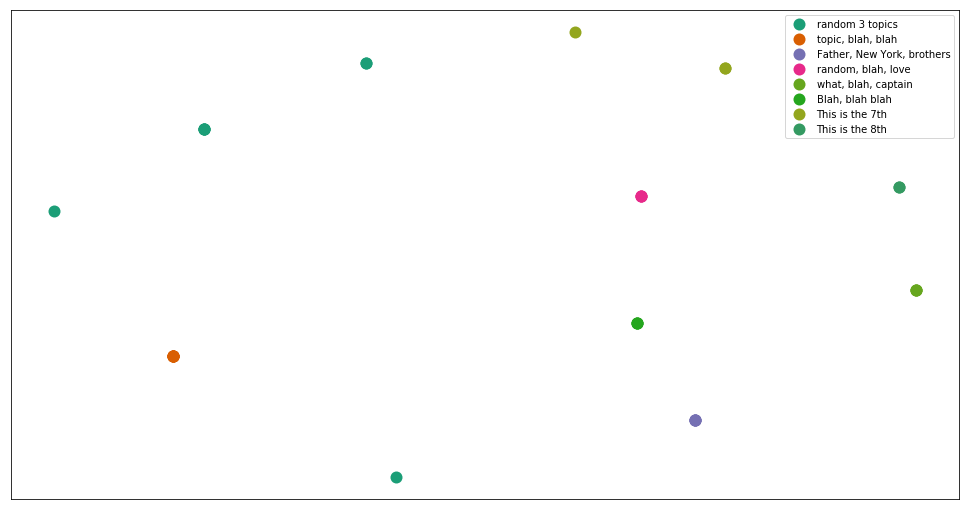

In [531]:
# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
# for i in range(len(dfpt2)):
#     ax.text(dfpt2.ix[i]['x'], dfpt2.ix[i]['y'], dfpt2.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [ ]:
# for tweet in results:
#     data = {}
#     data['tweet'] = tweet.text.encode('utf-8') 
#     data['datetime'] = tweet.created_at
#     tweets.insert_one(data)

In [165]:
from pandas import DataFrame

dff = DataFrame(list(db.stocks.find({})))

In [166]:
dff

,_id,created_at,id,text
0,5935f1d8ea2a7c037b2ef58d,2015-08-05 16:03:24,628959498359603202,b'$SPY 210.95 sell print 1.4 mil http://t.co/vjUy0wNcZH'
1,5935f1d8ea2a7c037b2ef58e,2015-12-31 15:55:47,682590986015490048,b'The Stock Whisper Of The Day: $WTW $SPY https://t.co/O0AHqoXBr0'
2,5935f1d8ea2a7c037b2ef58f,2016-12-21 14:46:35,811583650479411200,b'The #Stock Whisper Of The Day:$FCX $IAU $MU $EWZ $SPY https://t.co/P0l9y02ts7'
3,5935f1d8ea2a7c037b2ef590,2016-11-10 14:41:59,796724592693878784,b'Commented on StockTwits: I follow the good money ;-) the smart mo... https://t.co/vU3ZuJP6q3'
4,5935f1d8ea2a7c037b2ef591,2015-06-26 12:19:37,614407664668311552,"b""Yesterday's #Whisper $STM approaching 8.60 target $$ http://t.co/eCQT03AzeT"""
5,5935f1d8ea2a7c037b2ef592,2016-11-14 14:32:16,798171698180689921,"b""Today's #HOT #Whisper $MT $USO $NUGT https://t.co/MzA0T4BLkp"""
6,5935f1d8ea2a7c037b2ef593,2015-12-21 03:35:59,678780931822497792,b'@traderstack I also call out my swing trades in my live trading room'
7,5935f1d8ea2a7c037b2ef594,2015-08-24 14:41:53,635824354157293568,b'The #Stock Whisper Of The Day: $CSIQ http://t.co/y23AhrubzN'
8,5935f1d8ea2a7c037b2ef595,2016-03-27 18:36:47,714159248314224641,"b'Don\'t miss out FREE #HOT online webinar ""How to read the tape using old fashioned levels and dark pool data feed"" https://t.co/X9CP8Eh2ev'"
9,5935f1d8ea2a7c037b2ef596,2016-01-07 03:30:53,684940241753391104,b'Another volatile night $/ES_F down big already. Sleeping in my STFR t-shirt tonight $SPY https://t.co/fwauLV2Ixr'
